#### Example 4 - `stripy` gradients on the sphere

SSRFPACK ... 


#### Notebook contents

   - [Sample meshes](#Sample-meshes)


The next example is [Ex5-](#)

### Define a computational mesh

Use the (usual) icosahedron with face points included. 

In [1]:
import stripy as stripy

mesh = stripy.icosahedral_mesh(refinement_levels=4, include_face_points=True)

print mesh.npoints

7682


### Analytic function 

Define a relatively smooth function that we can interpolate from the coarse mesh to the fine mesh and analyse 

In [26]:
import numpy as np

def analytic(lons, lats, k1, k2):
     return np.cos(k1*lons) * np.sin(k2*lats)

def analytic_ddlon(lons, lats, k1, k2):
     return -k1 * np.sin(k1*lons) * np.sin(k2*lats) / np.cos(lats)

def analytic_ddlat(lons, lats, k1, k2):
     return k2 * np.cos(k1*lons) * np.cos(k2*lats) 

analytic_sol = analytic(mesh.lons, mesh.lats, 5.0, 2.0)
analytic_sol_ddlon = analytic_ddlon(mesh.lons, mesh.lats, 5.0, 2.0)
analytic_sol_ddlat = analytic_ddlat(mesh.lons, mesh.lats, 5.0, 2.0)


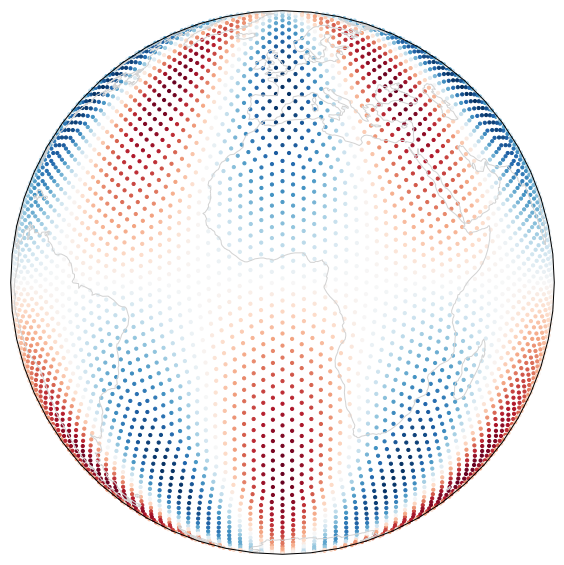

In [22]:
%matplotlib inline

import gdal
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10, 10), facecolor="none")
ax  = plt.subplot(111, projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0, globe=None))
ax.coastlines(color="lightgrey")
ax.set_global()

lons0 = np.degrees(mesh.lons)
lats0 = np.degrees(mesh.lats)

ax.scatter(lons0, lats0, 
            marker="o", s=10.0, transform=ccrs.Geodetic(), c=analytic_sol, cmap=plt.cm.RdBu)

pass

### Derivatives of solution compared to analytic values

The `gradient_lonlat` method of the sTriangulation takes a data array reprenting values on the mesh vertices and returns the lon and lat derivatives. There is an equivalent `gradient_xyz` method which returns the raw derivatives in Cartesian form. Although this is generally less useful, if you are computing the slope (for example) that can be computed in either coordinate system and may cross the pole, consider using the Cartesian form. 



In [14]:
stripy_ddlon, stripy_ddlat = mesh.gradient_lonlat(analytic_sol)


In [27]:
import lavavu

lv = lavavu.Viewer(border=False, background="#FFFFFF", resolution=[1000,600], near=-10.0)

nodes = lv.points("nodes", pointsize=3.0, pointtype="shiny", colour="#448080", opacity=0.75)
nodes.vertices(mesh.points)

tris = lv.triangles("triangles",  wireframe=False, colour="#77ff88", opacity=1.0)
tris.vertices(mesh.points)
tris.indices(mesh.simplices)
tris.values(analytic_sol, label="original")
tris.values(stripy_ddlon, label="ddlon")
tris.values(stripy_ddlat, label="ddlat")
tris.values(stripy_ddlon-analytic_sol_ddlon, label="ddlonerr")
tris.values(stripy_ddlat-analytic_sol_ddlat, label="ddlaterr")

# and the errors

tris.colourmap("#990000 #FFFFFF #000099")


cb = tris.colourbar()

lv.control.Panel()
lv.control.Range('specular', range=(0,1), step=0.1, value=0.4)
lv.control.Checkbox(property='axis')
lv.control.ObjectList()
tris.control.List(["original", "ddlon", "ddlat", "ddlonerr", "ddlaterr"], property="colourby", value="orginal", command="redraw")
lv.control.show()

<IPython.core.display.Javascript object>